In [1]:
import os
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import medmnist
from medmnist import BreastMNIST
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter  # to print to tensorboard
import os
import shutil

import os
from tensorboard import program

import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
from torch import optim  # For optimizers like SGD, Adam, etc.
from tqdm import tqdm  # For nice progress bar!
import torchvision.datasets as datasets  # Standard datasets

from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

transform = transforms.Compose([
    # transforms.RandomAdjustSharpness(p=1,sharpness_factor=1.1),
    # transforms.RandomEqualize(p=0.3),
    # transforms.RandomVerticalFlip(p=0.1),
    # transforms.RandomHorizontalFlip(p=0.1),
    #transforms.Pad(padding=98, fill=0),  # Zero padding to make the image 224x224
    #transforms.Pad(padding=50, fill=0),  # Add zero padding to make 128x128
    #transforms.Resize((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize((0.5,), (0.5,))  # Mean and standard deviation for grayscale images
])

batch_size=64
#loading train,val,test into variables
train_data=medmnist.BreastMNIST(split="train",transform=transform)
val_data=medmnist.BreastMNIST(split="val",transform=transforms.ToTensor())
test_data=medmnist.BreastMNIST(split="test",transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=1, shuffle=False)

# Set device cuda for GPU if it's available otherwise run on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.get_device_name(0)



cuda


'NVIDIA GeForce GTX 1650'

In [2]:

# Function to copy tensor files save
def copy_directory(source_dir, destination_dir):
    """
    Copies all files and folders from a source directory to a destination directory.

    Args:
        source_dir (str): The path to the source directory.
        destination_dir (str): The path to the existing destination directory.
    """
    try:
        # Ensure the destination directory exists
        if not os.path.isdir(destination_dir):
            print(f"Error: Destination directory '{destination_dir}' does not exist.")
            return

        # Copy the content of source dir to destination directory
        shutil.copytree(source_dir, os.path.join(destination_dir, os.path.basename(source_dir)))
        print(f"Successfully copied the content of '{source_dir}' to '{destination_dir}'")

    except FileNotFoundError:
        print(f"Error: Source directory '{source_dir}' not found.")
    except shutil.Error as e:
        print(f"Error during copy: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")



#function to clear tensorboard files

def clear_folder(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return
    
    # Iterate through all items in the folder
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        try:
            # Remove directories
            if os.path.isdir(item_path):
                shutil.rmtree(item_path)
            # Remove files
            else:
                os.remove(item_path)
            print(f"Deleted: {item_path}")
        except Exception as e:
            print(f"Failed to delete {item_path}: {e}")
    
    print(f"All contents of the folder '{folder_path}' have been cleared.")
    #location of tensorboard folder
folder="runs/DisplayImage"


class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        """
        Here we define the layers of the network. We create two fully connected layers

        Parameters:
            input_size: the size of the input, in this case 784 (28x28)
            num_classes: the number of classes we want to predict, in this case 2 (0-1)

        """
        super(NN, self).__init__()
        # # Our first linear layer take input_size, in this case 784 nodes to 50
        # # and our second linear layer takes 50 to the num_classes we have, in
        # # this case 10.
        # self.fc1 = nn.Linear(input_size, 50)
        # self.fc2 = nn.Linear(50, num_classes)

        self.flatten = nn.Flatten() #flattens the input tensors
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 50),
            nn.ReLU(),
            nn.Linear(50, 2),
            # nn.ReLU(),
            # nn.Linear(512, 2)
        )

    def forward(self, x):
        """
        x here is the mnist images and we run it through the network that we created above.
        Parameters:
            x: mnist images
        Returns:
            out: the output of the network
        """
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


class CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=2):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(  #same convolution
            in_channels=in_channels,
            out_channels=8,
            kernel_size=3,
            stride=1,
            padding=1,
        )
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(
            in_channels=8,
            out_channels=16, 
            kernel_size=3,
            stride=1,
            padding=1,
        )
        self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        return x

class NN2(nn.Module):
    def __init__(self, input_size, num_classes):
        """
        Here we define the layers of the network. We create two fully connected layers

        Parameters:
            input_size: the size of the input, in this case 784 (28x28)
            num_classes: the number of classes we want to predict, in this case 10 (0-9)

        """
        super(NN2, self).__init__()
        # Our first linear layer take input_size, in this case 784 nodes to 50
        # and our second linear layer takes 50 to the num_classes we have, in
        # this case 10.
        self.flatten = nn.Flatten() #flattens the input tensors
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
        """
        x here is the mnist images and we run it through fc1, fc2 that we created above.
        we also add a ReLU activation function in between and for that (since it has no parameters)
        I recommend using nn.functional (F)

        Parameters:
            x: mnist images

        Returns:
            out: the output of the network
        """
        x=self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    accuracies=[]
    batch_loss=0
    for batch, (input_data, class_cat) in enumerate(tqdm(dataloader)):
        input_data, class_cat = input_data.to(device), class_cat.to(device)

        ## Compute prediction error
        pred = model(input_data)
        class_cat=class_cat.squeeze().long()
        loss = loss_fn(pred, class_cat)

        ## Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        ## calculation running loss
        loss, current = loss.item(), (batch + 1) * len(input_data)


        ##caculating running accuracy
        _, predictions = pred.max(1)
        num_correct = (predictions == class_cat).sum()
        running_train_acc = float(num_correct) / float(input_data.shape[0])
        # print("model Output>>>>>")
        # print(pred)
        # print("predictions>>>")
        # print(predictions)
        # print("num_correct>>>>>")
        # print(num_correct)
        # print("accuracy>>>>")
        # print(running_train_acc)
        # print(data.shape[0])
        # print(input_data.shape[0])
        accuracies.append(running_train_acc)

        ##Plot stuff to tensorboard tensorboard
        global step
        writer.add_scalar("Batch/Training loss",loss,global_step=step)
        writer.add_scalar("Batch/Training Accuracy", running_train_acc, global_step=step)
        # global batch_loss
        # batch_loss.append(loss)
        batch_loss+=loss

        
        step += 1


        #print(f"loss: {loss:>7f} accuracy: {running_train_acc:>5f}  [{current:>5d}/{size:>5d}]")
    
    ## Calculate epoch accuracy
    epoch_accuracy=sum(accuracies)/len(accuracies)

    ## Getting the average epoch loss
    epoch_loss=batch_loss/size
    
    ## Send it to tensorboard
    writer.add_scalars("Epoch/Epoch loss",{'Train':epoch_loss},global_step=epoch)
    writer.add_scalars("Epoch/Epoch Accuracy",{"Train":epoch_accuracy},global_step=epoch)
    
def val(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y=y.squeeze().long()
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    writer.add_scalars("Epoch/Epoch loss",{'Val':test_loss},global_step=epoch)
    writer.add_scalars("Epoch/Epoch Accuracy",{"Val":correct},global_step=epoch)
    print(f"val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    val_acc=correct
    # Save the model if it's the best so far
    global best_val_acc
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model_weights.pth")
        print(f"New best model saved with accuracy: {best_val_acc:.4f}")
        # Log accuracy to TensorBoard
        writer.add_scalar("Val Accuracy", correct,global_step=1)




def test(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y = y.squeeze().long()
            pred = model(X)
            # Collect predictions and true labels
            all_labels.append(int(y))
            all_predictions.append(int(pred.argmax(1)))
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Calculate accuracy
    correct /= size

    # Build confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    class_names = ["False", "Positive"]  # Update as needed for your use case

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()  # Ensure labels fit within figure boundaries
    

    # Convert plot to image
    fig = plt.gcf()
    fig.canvas.draw()
    width, height = fig.canvas.get_width_height()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape(height, width, 3)
    plt.show()
    plt.close(fig)  # Close figure to free memory

    # Log image to 
    writer.add_image("Confusion Matrix", np.transpose(image, (2, 0, 1)),global_step=1)
 
    # Log accuracy to TensorBoard
    writer.add_scalar("Test Accuracy", correct,global_step=1)

    # Print accuracy
    print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%\n")

print("Done")

def savemodel(model_name,model,tensor_path):

    #Create folder for new model in saved model
    try:
        os.mkdir(f"Saved_models/{model_name}") # Will not create parent folders, unlike os.makedirs()
        print(f"Folder created successfully")
    except OSError as e:
        print(f"Error creating folder: {e}")

    #Copy tensorboard data of the session to     
    tensorpath="runs\DisplayImage"
    copy_directory(tensorpath,f"Saved_models/{model_name}")

    # 7. Save entire model (Less recommended).
    save_entire_model_path = f"Saved_models/{model_name}/{model_name}.pth"
    torch.save(model, save_entire_model_path)
    print(f"Entire model saved to: {save_entire_model_path}")   


Done


Using cache found in C:\Users\User/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\User\anaconda3\envs\MLS_CW\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\anaconda3\envs\MLS_CW\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

100%|██████████| 9/9 [00:00<00:00, 17.93it/s]


val Error: 
 Accuracy: 69.2%, Avg loss: 0.676704 

New best model saved with accuracy: 0.6923
Epoch 2
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.17it/s]


val Error: 
 Accuracy: 71.8%, Avg loss: 0.636093 

New best model saved with accuracy: 0.7179
Epoch 3
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.52it/s]


val Error: 
 Accuracy: 73.1%, Avg loss: 0.633369 

New best model saved with accuracy: 0.7308
Epoch 4
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.10it/s]


val Error: 
 Accuracy: 75.6%, Avg loss: 0.662310 

New best model saved with accuracy: 0.7564
Epoch 5
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.78it/s]


val Error: 
 Accuracy: 71.8%, Avg loss: 0.650569 

Epoch 6
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.29it/s]


val Error: 
 Accuracy: 75.6%, Avg loss: 0.559642 

Epoch 7
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.35it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.462041 

New best model saved with accuracy: 0.8333
Epoch 8
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.28it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.457657 

Epoch 9
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.98it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.477560 

Epoch 10
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.30it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.426429 

Epoch 11
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.75it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.393810 

Epoch 12
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.19it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.387412 

Epoch 13
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.21it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.493851 

Epoch 14
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.75it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.422573 

Epoch 15
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.96it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.407793 

Epoch 16
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.99it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.384833 

Epoch 17
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.65it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.429469 

Epoch 18
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.08it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.434590 

Epoch 19
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.55it/s]


val Error: 
 Accuracy: 84.6%, Avg loss: 0.524220 

New best model saved with accuracy: 0.8462
Epoch 20
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.87it/s]


val Error: 
 Accuracy: 84.6%, Avg loss: 0.340795 

Epoch 21
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.91it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.434508 

Epoch 22
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.17it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.500715 

Epoch 23
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.85it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.372027 

Epoch 24
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.80it/s]


val Error: 
 Accuracy: 84.6%, Avg loss: 0.443294 

Epoch 25
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.72it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.606578 

Epoch 26
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.11it/s]


val Error: 
 Accuracy: 88.5%, Avg loss: 0.391587 

New best model saved with accuracy: 0.8846
Epoch 27
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.01it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.416718 

Epoch 28
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.73it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.328772 

Epoch 29
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.87it/s]


val Error: 
 Accuracy: 84.6%, Avg loss: 0.474322 

Epoch 30
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.43it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.441313 

Epoch 31
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.36it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.492759 

Epoch 32
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.36it/s]


val Error: 
 Accuracy: 84.6%, Avg loss: 0.386475 

Epoch 33
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 32.15it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.432498 

Epoch 34
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.16it/s]


val Error: 
 Accuracy: 78.2%, Avg loss: 0.422415 

Epoch 35
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.90it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.323755 

Epoch 36
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.68it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.409061 

Epoch 37
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.74it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.386652 

Epoch 38
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.15it/s]


val Error: 
 Accuracy: 78.2%, Avg loss: 0.487800 

Epoch 39
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.83it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.423578 

Epoch 40
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 29.97it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.497348 

Epoch 41
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.42it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.486773 

Epoch 42
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.01it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.517161 

Epoch 43
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.68it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.506049 

Epoch 44
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.73it/s]


val Error: 
 Accuracy: 87.2%, Avg loss: 0.397909 

Epoch 45
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.26it/s]


val Error: 
 Accuracy: 85.9%, Avg loss: 0.332704 

Epoch 46
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 28.54it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.549350 

Epoch 47
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.73it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.462904 

Epoch 48
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.74it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.589807 

Epoch 49
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.80it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.472802 

Epoch 50
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.77it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.475949 

Epoch 51
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.85it/s]


val Error: 
 Accuracy: 85.9%, Avg loss: 0.437986 

Epoch 52
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.92it/s]


val Error: 
 Accuracy: 78.2%, Avg loss: 0.442908 

Epoch 53
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 32.07it/s]


val Error: 
 Accuracy: 78.2%, Avg loss: 0.495001 

Epoch 54
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.61it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.607756 

Epoch 55
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.75it/s]


val Error: 
 Accuracy: 87.2%, Avg loss: 0.500734 

Epoch 56
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.10it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.385438 

Epoch 57
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.67it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.428173 

Epoch 58
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.37it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.527618 

Epoch 59
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.10it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.376889 

Epoch 60
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.36it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.488254 

Epoch 61
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.59it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.412591 

Epoch 62
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.81it/s]


val Error: 
 Accuracy: 76.9%, Avg loss: 0.549813 

Epoch 63
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.81it/s]


val Error: 
 Accuracy: 76.9%, Avg loss: 0.454216 

Epoch 64
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 32.13it/s]


val Error: 
 Accuracy: 78.2%, Avg loss: 0.438233 

Epoch 65
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.46it/s]


val Error: 
 Accuracy: 84.6%, Avg loss: 0.431264 

Epoch 66
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.34it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.416869 

Epoch 67
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.70it/s]


val Error: 
 Accuracy: 85.9%, Avg loss: 0.332026 

Epoch 68
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.02it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.530148 

Epoch 69
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.63it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.450973 

Epoch 70
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.33it/s]


val Error: 
 Accuracy: 84.6%, Avg loss: 0.548484 

Epoch 71
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.80it/s]


val Error: 
 Accuracy: 83.3%, Avg loss: 0.500911 

Epoch 72
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.49it/s]


val Error: 
 Accuracy: 76.9%, Avg loss: 0.545284 

Epoch 73
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.78it/s]


val Error: 
 Accuracy: 78.2%, Avg loss: 0.497247 

Epoch 74
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.57it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.464270 

Epoch 75
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.55it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.556866 

Epoch 76
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 32.13it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.549345 

Epoch 77
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.39it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.609406 

Epoch 78
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.94it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.587026 

Epoch 79
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 32.02it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.513106 

Epoch 80
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.47it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.506781 

Epoch 81
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.48it/s]


val Error: 
 Accuracy: 78.2%, Avg loss: 0.586000 

Epoch 82
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.83it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.484256 

Epoch 83
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.96it/s]


val Error: 
 Accuracy: 71.8%, Avg loss: 0.451343 

Epoch 84
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.86it/s]


val Error: 
 Accuracy: 75.6%, Avg loss: 0.637888 

Epoch 85
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.31it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.743329 

Epoch 86
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.28it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.828633 

Epoch 87
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.64it/s]


val Error: 
 Accuracy: 78.2%, Avg loss: 0.724162 

Epoch 88
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.24it/s]


val Error: 
 Accuracy: 78.2%, Avg loss: 0.569074 

Epoch 89
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.54it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.666822 

Epoch 90
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.37it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.692953 

Epoch 91
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.57it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.671466 

Epoch 92
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.51it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.757867 

Epoch 93
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.40it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.690426 

Epoch 94
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.39it/s]


val Error: 
 Accuracy: 78.2%, Avg loss: 0.674508 

Epoch 95
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.29it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.629078 

Epoch 96
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.48it/s]


val Error: 
 Accuracy: 80.8%, Avg loss: 0.697499 

Epoch 97
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.89it/s]


val Error: 
 Accuracy: 82.1%, Avg loss: 0.486667 

Epoch 98
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.07it/s]


val Error: 
 Accuracy: 79.5%, Avg loss: 0.756612 

Epoch 99
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 31.72it/s]


val Error: 
 Accuracy: 73.1%, Avg loss: 0.798234 

Epoch 100
-------------------------------


100%|██████████| 9/9 [00:00<00:00, 30.99it/s]
C:\Users\User\AppData\Local\Temp\ipykernel_23992\4115863164.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_sta

val Error: 
 Accuracy: 75.6%, Avg loss: 1.434759 

Best val_accuracy after training=0.8846153846153846 


C:\Users\User\AppData\Local\Temp\ipykernel_23992\21450537.py:290: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape(height, width, 3)


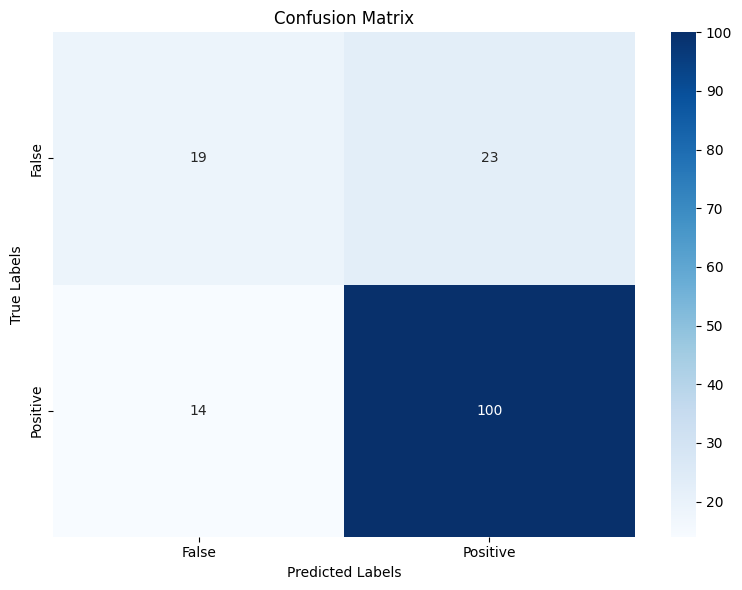

Test Error: 
 Accuracy: 76.3%

val Error: 
 Accuracy: 88.5%, Avg loss: 0.391587 

Done!


In [24]:
# Hyperparameters
num_classes = 2
learning_rate = 0.001
num_epochs = 100


model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)

# Freeze the model
for param in model.parameters():
    param.requires_grad=False

model.conv1 = nn.Conv2d(
    in_channels=1,  # Change to 1 channel for grayscale
    out_channels=64,
    kernel_size=(7, 7),
    stride=(2, 2),
    padding=(3, 3),
    bias=False
)





# Adjust the fully connected layer to match the number of output classes

model.fc = nn.Linear(512, 2)
print(model)

## Setting up training and test function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Move model to the correct device
model = model.to(device)

##clear tensorboard folder
clear_folder(folder)
writer = SummaryWriter(f"runs/DisplayImage")

#show using dataset on tensorboard
for index, (data,label) in enumerate(train_loader):
    data,label=train_data[index]
    writer.add_image("mnist_images", data,index)

# Visualize model in TensorBoard
example_img, labels = next(iter(train_loader))
#example_img=example_img[0]
writer.add_graph(model,example_img.to(device))
print("Model sent to tensorboard")


step=0
# epoch_loss=[]
best_val_acc=0.0
for t in range(num_epochs):
    epoch=t
    # batch_loss=[]
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    
    # epoch_loss.append(sum(batch_loss)/len(batch_loss))
    # writer.add_scalar("Epoch Training loss",epoch_loss[t],global_step=t)
    val(val_loader, model, loss_fn)

print(f"Best val_accuracy after training={best_val_acc} ")
model.load_state_dict(torch.load("best_model_weights.pth"))
test(test_loader,model)
val(val_loader, model, loss_fn)
writer.close()
print("Done!")

In [25]:
modelname="Res18_LP_run3"

try:
    os.mkdir(f"Saved_models/Linear_probing/{modelname}") # Will not create parent folders, unlike os.makedirs()
    print(f"Folder created successfully")
except OSError as e:
    print(f"Error creating folder: {e}")    
tensorpath="runs\DisplayImage"
copy_directory(tensorpath,f"Saved_models/Linear_probing/{modelname}")

# 7. Save entire model (Less recommended).
save_entire_model_path = f"Saved_models/Linear_probing/{modelname}/{modelname}.pth"
torch.save(model, save_entire_model_path)
print(f"Entire model saved to: {save_entire_model_path}")




Folder created successfully
Successfully copied the content of 'runs\DisplayImage' to 'Saved_models/Linear_probing/Res18_LP_run3'
Entire model saved to: Saved_models/Linear_probing/Res18_LP_run3/Res18_LP_run3.pth


C:\Users\User\AppData\Local\Temp\ipykernel_23992\3002468151.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_entire_model = torch.load(f"Saved_models/Linear_probin

Entire model loaded successfully!


C:\Users\User\AppData\Local\Temp\ipykernel_23992\21450537.py:290: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape(height, width, 3)


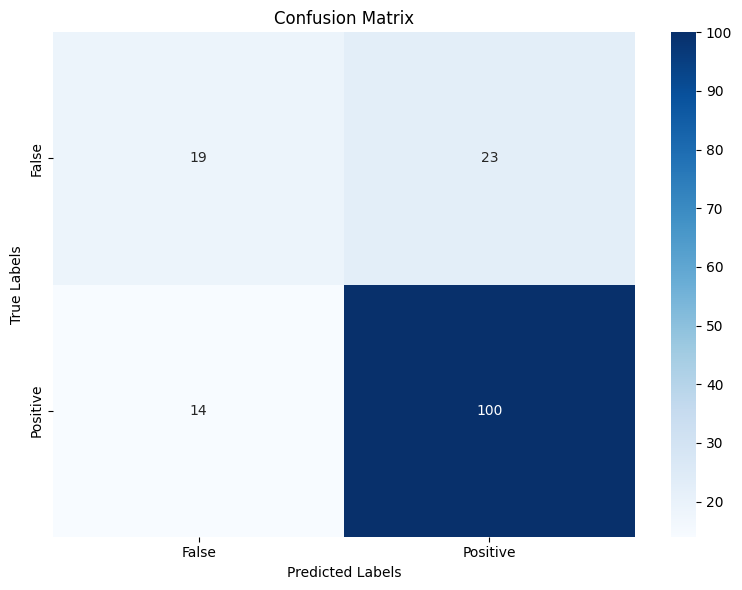

Test Error: 
 Accuracy: 76.3%



In [26]:
modelname="Res18_LP_run3"
# 8. Load entire model
loaded_entire_model = torch.load(f"Saved_models/Linear_probing/{modelname}/{modelname}.pth")
loaded_entire_model = loaded_entire_model.to(device)
loaded_entire_model.eval()
print("Entire model loaded successfully!")
test(test_loader,loaded_entire_model)
